<a href="https://colab.research.google.com/github/mekhi-woods/HiloCATsSN1991bg/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple snpy

In [ ]:
!git clone https://github.com/mekhi-woods/HiloCATsSN1991bg.git

In [ ]:
"""
Plotting 91bg like 1a to get an idea of what they look like
"""
import matplotlib.pyplot as plt
import numpy as np

FILTER_WHEEL = ['u', 'g', 'r', 'i', 'B', 'V0']

if __name__ == '__main__':
    KrisciunasPath = "/content/HiloCATsSN1991bg/targetLists/91bglike_justnames.txt"
    KrisciunasNames = np.genfromtxt(KrisciunasPath, dtype=str, delimiter=', ')

    allCPSPhot = "/content/HiloCATsSN1991bg/data/CSPdata/SN_photo.dat"
    allCPSPhotData = np.genfromtxt(allCPSPhot, dtype='str')

    names = allCPSPhotData[:,0]
    filters = allCPSPhotData[:,1]
    time = allCPSPhotData[:,2]
    light = allCPSPhotData[:,3]
    err = allCPSPhotData[:,4]

    plt.figure(figsize=(10,6))
    sigma = 1
    for tar in KrisciunasNames:
        for n in range(len(FILTER_WHEEL)):
            # output_names = names[(names == tar) & (filters == FILTER_WHEEL[n])]
            output_light = light[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64')
            output_time = time[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64') + 53000
            output_err = err[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64')
            plt.errorbar(output_time, output_light, yerr=output_err*sigma, fmt='o', label=FILTER_WHEEL[n])

        plt.title(tar); plt.xlabel('Time [MJD]'); plt.ylabel('Intensity [mag]')
        plt.gca().invert_yaxis()
        plt.legend()
        # plt.savefig('save\\'+str(tar)+'.png')
        plt.show()
        break


[ 0  / 13] Fiting data for SN2005bl...
Redshift:		 z = 0.0241
SNooPy Distance: 	 D = 103.5735 Mpc
Manual Distance: 	 D = 125.2316 Mpc


[ 1  / 13] Fiting data for SN2005ke...
Redshift:		 z = 0.0049
SNooPy Distance: 	 D = 18.2481 Mpc
Manual Distance: 	 D = 20.7327 Mpc


[ 3  / 13] Fiting data for SN2006gt...
Redshift:		 z = 0.0448
SNooPy Distance: 	 D = 182.3925 Mpc
Manual Distance: 	 D = 89.126 Mpc


[ 4  / 13] Fiting data for SN2006mr...
Redshift:		 z = 0.0059
SNooPy Distance: 	 D = 22.4602 Mpc
Manual Distance: 	 D = 17.0045 Mpc


[ 5  / 13] Fiting data for SN2007N_...
Redshift:		 z = 0.0129
SNooPy Distance: 	 D = 57.2349 Mpc
Manual Distance: 	 D = 39.029 Mpc


[ 6  / 13] Fiting data for SN2007al...
Redshift:		 z = 0.0122
SNooPy Distance: 	 D = 54.4352 Mpc
Manual Distance: 	 D = 58.0242 Mpc


[ 8  / 13] Fiting data for SN2007ba...
Redshift:		 z = 0.0385
SNooPy Distance: 	 D = 162.4838 Mpc
Manual Distance: 	 D = 72.2101 Mpc


[ 10  / 13] Fiting data for SN2008bi...
Redshift:		 z = 0.01

<Figure size 800x768 with 0 Axes>

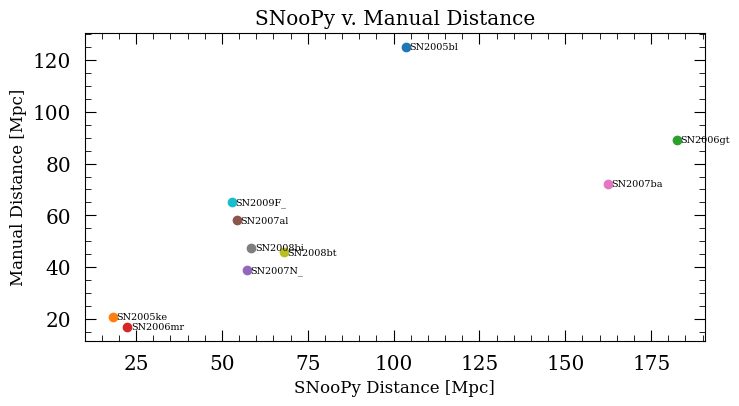

In [94]:
"""
SNooPy fitting on CSP data
"""
import matplotlib.pyplot as plt
import numpy as np
import snpy

def snpy_fit(filePath, model='max_model', shapeParam='dm15', BandsToFit = ['B','g','r','i'], summarize=True):
    s = snpy.get_sn(filePath)

    # Set model parameters
    s.choose_model(model, stype=shapeParam)
    s.set_restbands() # Auto pick appropriate rest-bands

    # Fit data -- using David configurations
    fitargs = {'mangle':1,'calibration':0} # I don't remember what calibration is
    s.fit(BandsToFit,
          dokcorr=True,
          k_stretch=False,
          reset_kcorrs=True,
          **fitargs)

    # Show results
    if summarize:
        s.summary()
        # for param in s.parameters:
        #     print("{} = {} +/- {}".format(param, s.parameters[param], s.errors[param]))
    return s

def manual_dist_calc(s, M_B = -16.38):
    peakmB = s.get_max(['B'], use_model=True)[1][0]
    mu = peakmB - M_B
    dist = (10**((mu+5)/5)) / 1e6 # in Mpc
    return dist

if __name__ == '__main__':
    # Initalize File -- SN2005ke
    KrisciunasNames = np.genfromtxt("/content/HiloCATsSN1991bg/targetLists/91bglike_justnames.txt", dtype=str, delimiter=', ')
    filePaths = []
    for tar in KrisciunasNames:
        filePaths.append('/content/HiloCATsSN1991bg/data/CSPdata/'+str(tar)+'_snpy.txt')

    # SNeObjs = []
    valid_n = [0,1,3,4,5,6,8,10,11,12]
    problem_children = [2,7,9]
    all_snpy_d = np.array([])
    all_manual_d = np.array([])
    all_names = np.array([])
    for n in valid_n:
        # Enter snpy fit function
        print('[', n+1, ' / 13]','Fiting data for '+filePaths[n][39:47]+'...')
        s_n = snpy_fit(filePaths[n], model='EBV_model2', shapeParam='st', BandsToFit = ['B','g','r','i'], summarize=False)
        all_names = np.append(all_names, filePaths[n][39:47])

        # Pull SNooPY distance
        mu = s_n.get_distmod() # Nab paramaters from SNe objects
        snpy_d = (10**((mu+5)/5)) / 1e6 # in Mpc
        all_snpy_d = np.append(all_snpy_d, snpy_d)

        # Manually calculate distance
        manual_d = manual_dist_calc(s_n, M_B = -16.38) # in B-filter, using M_B of SN1991bg
        all_manual_d = np.append(all_manual_d, manual_d)

        # Print info
        print('Redshift:\t\t z = '+str(s_n.z))
        print('SNooPy Distance: \t D = '+str(round(snpy_d, 4))+' Mpc')
        print('Manual Distance: \t D = '+str(round(manual_d, 4))+' Mpc')
        print('\n')
        plt.clf()

    # Save distances
    with open('calc_dist.txt', 'w') as f:
        for i in range(len(all_snpy_d)):
            f.write(str(all_names[i])+'\n')
            f.write('Redshift:\t\t\t z = '+str(s_n.z)+'\n')
            f.write('SNooPy Distance: \t D = '+str(round(all_snpy_d[i], 4))+' Mpc\n')
            f.write('Manual Distance: \t D = '+str(round(all_manual_d[i], 4))+' Mpc\n\n')

    # Plot manual_d vs snpy_d
    print("Ploting differences in distance calculations...")
    plt.figure(figsize=(8,4))
    for i in range(len(all_snpy_d)):
        plt.scatter(all_snpy_d[i], all_manual_d[i], linewidths=1)
        plt.text(all_snpy_d[i]+1, all_manual_d[i]-1, all_names[i], fontsize='xx-small')
    plt.title("SNooPy v. Manual Distance"); plt.xlabel('SNooPy Distance [Mpc]'); plt.ylabel('Manual Distance [Mpc]')
    plt.savefig('snpy_v_man_dist.png')
    plt.show()










